<img src = "https://rec-data.kalibrr.com/www.kalibrr.ph/logos/SSYTB3EN2CEV9HZDWPPE4JHP8X2T7CNC6SDZST8Y-5d0b4f4b.png" width = 600>

**Kelompok 01 - Final Project 1 (Introduction to Python Kampus Merdeka)**<br>

Anggota Kelompok:

1. Putu Wahyu Kusuma Wardhana<br>
PYTN-KS05-001

2. Aditya Gumilar<br>
PYTN-KS05-002

3. Taufik Aji Putra<br>
PYTN-KS05-003

Kumpulan data ini berisi informasi tentang catatan transaksi perjalanan menggunakan taksi Uber dan Lyft. Tujuan utama dari penelitian ini adalah untuk memprediksi harga perjalanan (Price) yang paling tepat dengan menggunakan analisis prediksi menggunakan algoritma Regresi Linier (Linear Regression). 

Pemilihan algoritma Regresi Linier dalam project ini, akan dicoba untuk memprediksi harga perjalanan (Price) menggunakan data dari waktu sebelumnya. Regresi linier mencoba memodelkan hubungan antara variabel dependen dan variabel independen dengan membuat persamaan linier untuk mengamati data. Regresi linier mencoba menemukan hubungan matematis antar variabel. 

Sebelum melakukan proses pemodelan menggunakan algoritma regresi linier, perlu dilakukan pemilihan fitur yang benar agar dapat memaksimalkan kinerja model yang akan dibuat nantinya.

Database ini memiliki 57 atribut. Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut: 
- Mampu memahami konsep regression dengan Linear Regression 
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression 
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

<br>

**Attribute Information**

1. id
2. timestamp
3. hour
4. day
5. month
6. datetime
7. timezone
8. source: destinasi awal
9. destination: destinasi akhir
10. cab_type: tipe transportasi (uber / lyft)
11. dan lainnya


# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Load Dataset

**Mengimport dataset yang akan digunakan**

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'putuwahyukusumaw29'
os.environ['KAGGLE_KEY'] = 'bafa7539f1cdd0e95dd9704c84871a2b'

In [3]:
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

uber-and-lyft-dataset-boston-ma.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Ekstrak File berbentuk ZIP
from zipfile import ZipFile

file_name = "/content/uber-and-lyft-dataset-boston-ma.zip"

with ZipFile(file_name, 'r') as zip : 
  zip.extractall()
  print('Ekstrak File Berhasil')

Ekstrak File Berhasil


**Melihat dataset yang sudah diimport**

In [5]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


**Melihat dimensi dataset**

In [6]:
df.shape

(693071, 57)

**Melihat informasi tipe data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

# Data Preprocessing 1

## Handling Missing Values

**Melihat missing value pada dataset**

In [8]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Berdasarkan output missing values, pada kolom 'Price' memiliki jumlah missing value yang cukup banyak. Price ini merupakan variable dependen (Variabel yang dipengaruhi), sehingga kita tidak mungkin mengisi missing values tersebut karena dapat menyebabkan nilai akurasi yang kurang akurat. Maka akan dilakukan drop missing value pada kolom Price.

**Melakukan drop missing value**

In [9]:
df = df.dropna(subset=['price']).reset_index()

**Mengecek kembali missing value**

In [10]:
df.isnull().sum()

index                          0
id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatur

Dapat dilihat bahwa dataset sudah tidak memiliki missing-value

## Drop Features

**Melakukan drop pada beberapa fitur berdasarkan kondisi tertentu, diantaranya:**

- Kolom "index" tidak diperlukan karena duplikasi dari index yang sudah ada.
- Kolom "id" tidak diperlukan karena nilainya sangat unik dan mewakili setiap input.
- Kolom 'timestamp" dan "datetime" tidak diperlukan karena sudah dipecah menjadi month, day , dan hour.
- Kolom "long_summary" karena kolom "short_summary" sudah mewakili.
- Kolom yang berkaitan dengan waktu, seperti datetime, windGustTime dan lainnya, tidak diperlukan karena sudah diwakili oleh kolom "month", "day", dan "hour"
- Kolom "Longitude" dan "Latitude" tidak diperlukan karena sudah diwakili oleh kolom 'Destination'
 

In [11]:
df = df.drop(['index','id', 'timestamp', 'datetime', 'long_summary', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime',
             'windGustTime', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime',
              'apparentTemperatureMinTime', 'temperatureLowTime', 'apparentTemperatureMaxTime', 'latitude', 'longitude'],
             axis=1)
print(df.shape)
df.head()

(637976, 40)


,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


### Categorical


**Membuat dataframe berisikan feature kategorikal**

In [12]:
# Membuat dataframe berisikan feature kategorikal
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
df_categorical = df[categorical_columns]
df_categorical.head()

,timezone,source,destination,cab_type,product_id,name,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,partly-cloudy-night


**Mengecek nilai unik pada setiap feature kategorikal**

In [13]:
for col in categorical_columns:
    print("Unique Values for: ", col.upper())
    print("Count: ", df[col].nunique())
    print("-"*25)
    print(df[col].unique())
    print('='*50)

Unique Values for:  TIMEZONE
Count:  1
-------------------------
['America/New_York']
Unique Values for:  SOURCE
Count:  12
-------------------------
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
Unique Values for:  DESTINATION
Count:  12
-------------------------
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']
Unique Values for:  CAB_TYPE
Count:  2
-------------------------
['Lyft' 'Uber']
Unique Values for:  PRODUCT_ID
Count:  12
-------------------------
['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d

In [14]:
# Mengecek value pada kolom product id
df_categorical['product_id'].value_counts() 

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

In [15]:
# Hapus data atau kolom timezone dan product id sebesar 50% karena memiliki data yang kurang berkualitas
df = df.drop(['timezone','product_id'], axis=1)
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


### Numerical

**Membuat dataframe berisikan feature numerikal**

In [16]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
df_numerical = df[numerical_columns]
df_numerical.head()

,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,5.0,0.44,1.0,42.34,37.12,0.0000,0.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,11.0,0.44,1.0,43.58,37.35,0.1299,1.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,7.0,0.44,1.0,38.33,32.93,0.0000,0.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,26.0,0.44,1.0,34.38,29.63,0.0000,0.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,9.0,0.44,1.0,37.44,30.88,0.0000,0.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


**Mengecek setiap nama kolom pada feature numerical**

In [17]:
df_numerical.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

**Mengecek nilai unik pada setiap feature numerikal**

In [18]:
for col in numerical_columns:
    print("Unique Values for: ", col.upper())
    print("Count: ", df[col].nunique())
    print("-"*25)
    print(df[col].unique())
    print('='*50)

Unique Values for:  HOUR
Count:  24
-------------------------
[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 11  7 20 13 14  8 12 21 17 15]
Unique Values for:  DAY
Count:  17
-------------------------
[16 27 28 30 29 17 26  2  3 13 14 18  1 15  4 10  9]
Unique Values for:  MONTH
Count:  2
-------------------------
[12 11]
Unique Values for:  PRICE
Count:  147
-------------------------
[ 5.   11.    7.   26.    9.   16.5  10.5   3.   27.5  13.5  12.   16.
  7.5   5.5   3.5   8.5  15.   20.5  19.5  29.5   9.5  22.   13.   17.
 10.   34.   18.5  36.   22.5  32.5  25.   27.   35.    8.   23.5  14.
 26.5  38.5  23.   30.5  17.5  30.   36.5  12.5  33.5  21.5  38.   18.
 33.   32.    6.5  11.5  31.5  28.5  24.   29.   31.   42.5  41.   19.
 52.5  67.5  15.5  21.   45.5  28.   37.5  14.5  47.5   4.5  40.5  55.
 42.   46.5  50.5  24.5  41.5  56.   25.5  39.   57.5  20.   39.5   6.
 35.5  48.5  37.   45.   44.   34.5   2.5  46.   48.   47.   54.   52.
 62.   43.   43.5  80.   65.   51.5  40.   49.5 

**Mengecek korelasi pada feature yang memiliki persamaan jenis (Temperature) terhadap 'Price'**

In [19]:
df_temp = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]
df_temp.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


- Membuat Heatmap untuk melihat nilai korelasi

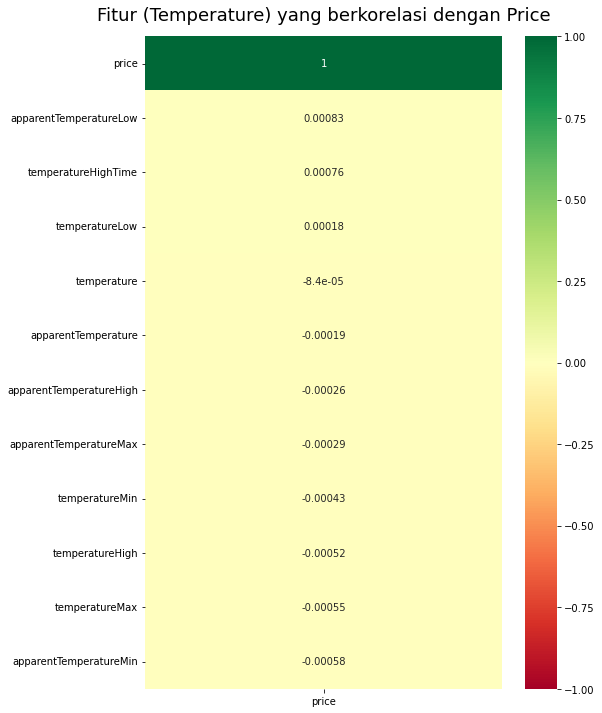

In [20]:
plt.figure(figsize=(8, 12))
heatmap1 =sns.heatmap(df_temp.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap1.set_title('Fitur (Temperature) yang berkorelasi dengan Price', fontdict={'fontsize':18}, pad=16);

Dari hasil visualisasi diatas dengan menggunakan heatmap, hampir keseluruhan fitur temperature memiliki korelasi yang lemah terhadap fitur Price. Karena disini kami mencari nilai korelasi yang kuat, sehingga fitur temperature akan di drop dari dataset yang kami gunakan.

**Melakukan drop semua feature (Temperature)**

In [21]:
df_temp = df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]
df = df.drop(df_temp.columns, axis=1)
print(df.shape)
df.head()

(637976, 27)


,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


Jika dilihat pada dataset, kolom menjadi berkurang. Karena disini kami mencari kolom atau fitur yang memiliki nilai korelasi paling kuat dengan fitur Price (data target) untuk prediksi.

**Mengecek korelasi pada feature yang memiliki persamaan jenis (Climate) terhadap 'Price'**

In [22]:
# Melakukan analisis untuk mengecek nilai korelasi antara data iklim/cuaca dengan data price (data target)
df_climate = ['price', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust',
          'visibility', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
          'ozone', 'moonPhase', 'precipIntensityMax', ]
df_climate = df[df_climate]
df_climate.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


- Membuat Heatmap untuk melihat nilai korelasi

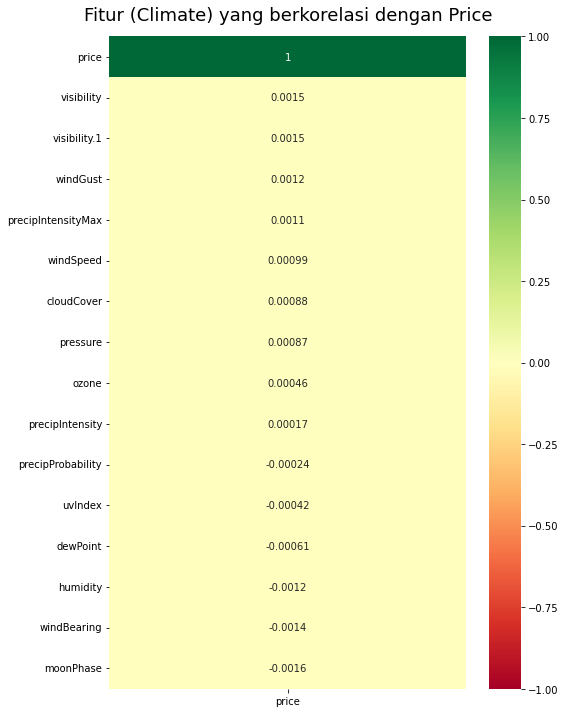

In [23]:
plt.figure(figsize=(8, 12))
heatmap2 = sns.heatmap(df_climate.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap2.set_title('Fitur (Climate) yang berkorelasi dengan Price', fontdict={'fontsize':18}, pad=16);

Dari hasil visualisasi diatas dengan menggunakan heatmap, hampir keseluruhan fitur iklim/cuaca memiliki korelasi yang lemah terhadap fitur Price. Karena disini kami mencari nilai korelasi yang kuat, sehingga fitur iklim akan di drop dari dataset yang kami gunakan.

In [24]:
df_climate = ['precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax']
df = df.drop(df_climate, axis=1)
print(df.shape)
df.head()

(637976, 12)


,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


# Exploratory Data Analysis (Uber dan Lyft)

Membuat variabel baru untuk mengecek data masing-masing tipe transformasi (**Uber dan Lyft**)

In [25]:
df_uber = df[df.cab_type == 'Uber']
df_lyft = df[df.cab_type == 'Lyft']

## Korelasi (Scatter Plot)

- Uber

Text(0.5, 1.0, 'Uber : Distance - Price (Scatter Plot)')

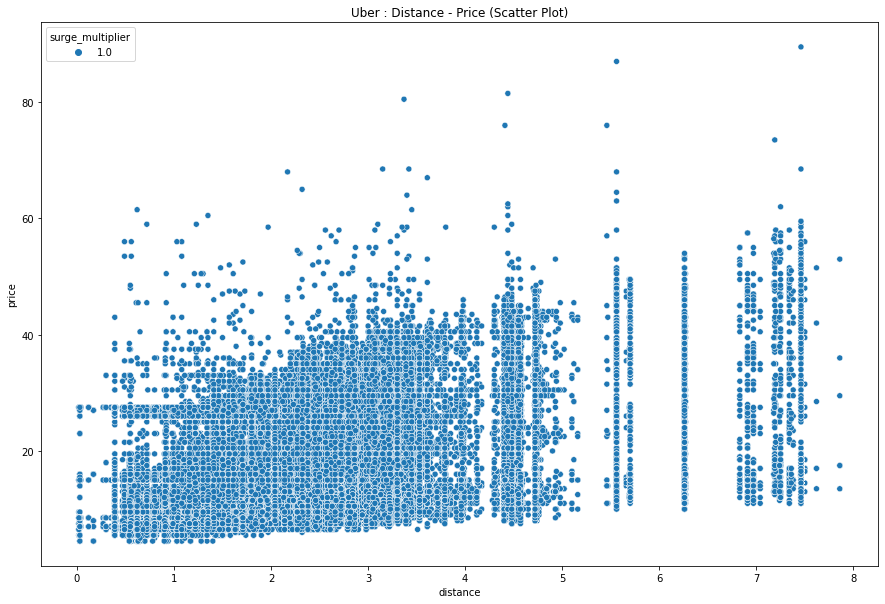

In [26]:
df_uber_dsp = df_uber[['distance','surge_multiplier','price']]

# plotting menggunakan scatter plot
plt.figure(figsize=(15,10))
sns.scatterplot(data = df_uber_dsp, x = 'distance', y='price', hue='surge_multiplier').set_title("Uber : Distance - Price (Scatter Plot)")


Dari visualisasi diatas, dapat dilihat bahwa fitur distance dan price tidak memiliki korelasi yang cukup kuat. Dikarenakan feature price tidak bertambah secara linier.

- Lyft

Text(0.5, 1.0, 'Lyft : Distance - Price (Scatter Plot)')

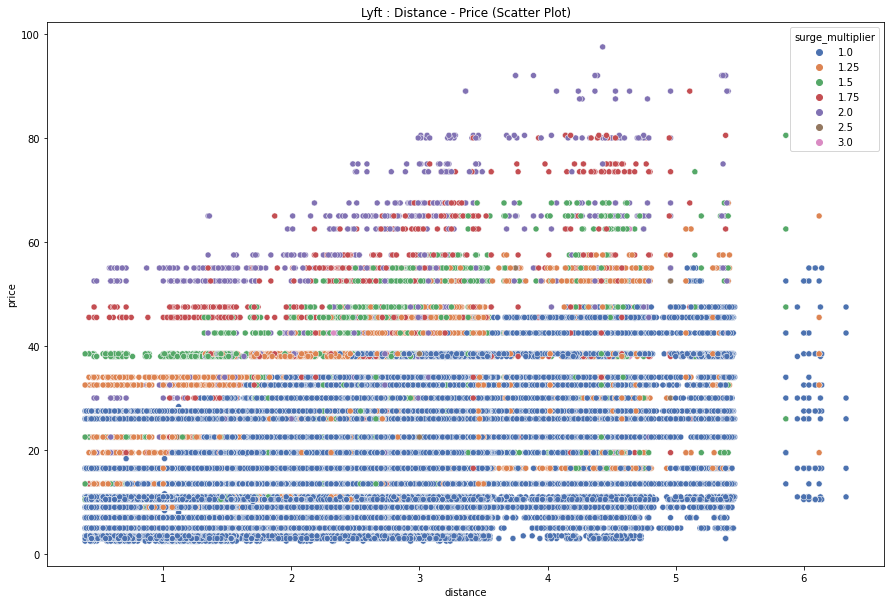

In [27]:
plt.figure(figsize=(15,10))
df_lyft_dsp = df_lyft[['surge_multiplier','distance','price']]
sns.scatterplot(data = df_lyft_dsp, x = 'distance', y='price', hue='surge_multiplier', palette='deep').set_title("Lyft : Distance - Price (Scatter Plot)")

Dari visualisasi diatas, dapat dilihat bahwa fitur distance dan price  memiliki korelasi yang cukup kuat. Dikarenakan fitur price akan bertambah secara linier seiring bertambahnya distance. Semakin tinggi harga, data surge multiplier juga akan ikut bertambah 

## Top 5 Source-Destination

**Urutan 5 teratas Source - Destinasi untuk setiap tipe transportasi.**

- Uber

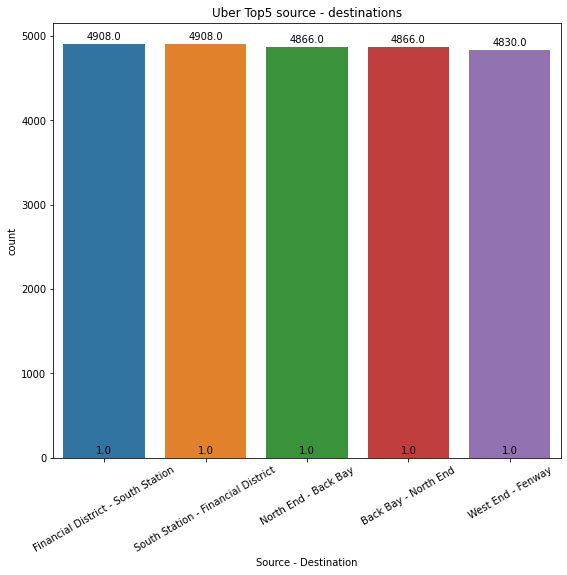

In [28]:
df_uber_2 = df_uber.groupby(['source','destination']).size().reset_index()
df_uber_2.columns = ['source','destination','total']
df_uber_2.sort_values('total', ascending=False, inplace=True)
df_uber_top5  = df_uber_2.head(5)
df_uber_top5 ["Source - Destination"] = df_uber_2["source"] + " - " + df_uber_2["destination"]
df_uber_top5  = df_uber_top5[["Source - Destination", "total"]]

#plotting bar plot
plt.figure(figsize=(20, 8))
plt.subplot(121)
bp_uber =sns.barplot(data = df_uber_top5 , x = "Source - Destination", y = "total")
bp_uber.set_title("Uber Top5 source - destinations")
loc, labels = plt.xticks()
bp_uber.set_xticklabels(labels, rotation=30);
ax = sns.countplot(x='Source - Destination', data=df_uber_top5)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')

Dapat dilihat pada bar plot diatas yakni 5 urutan teratas Source-Destination (Uber), **Financial District - South Station** menjadi urutan paling teratas diantara rute perjalanan lainnya.

- Lyft

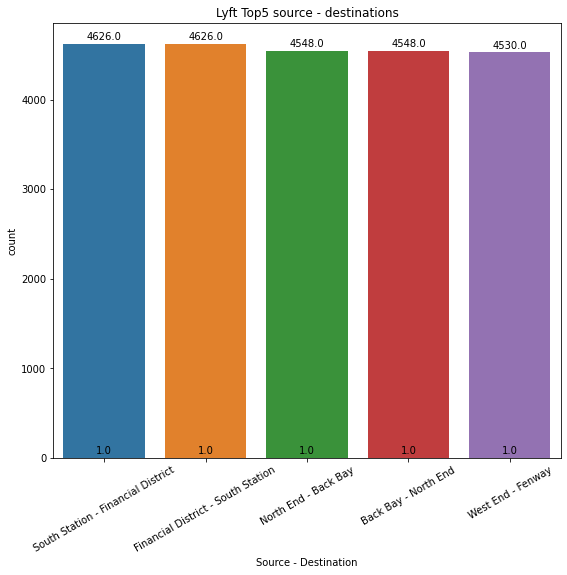

In [29]:
df_lyft_2 = df_lyft.groupby(['source','destination']).size().reset_index()
df_lyft_2.columns = ['source','destination','total']
df_lyft_2.sort_values('total', ascending=False, inplace=True)
df_lyft_top5  = df_lyft_2.head(5)
df_lyft_top5 ["Source - Destination"] = df_lyft_2["source"] + " - " + df_lyft_2["destination"]
df_lyft_top5  = df_lyft_top5[["Source - Destination", "total"]]

#plotting bar plot
plt.figure(figsize=(20, 8))
plt.subplot(121)
bp_lyft =sns.barplot(data = df_lyft_top5 , x = "Source - Destination", y = "total")
bp_lyft.set_title("Lyft Top5 source - destinations")
loc, labels = plt.xticks()
bp_lyft.set_xticklabels(labels, rotation=30);
ax = sns.countplot(x='Source - Destination', data=df_lyft_top5)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')

Dapat dilihat pada bar plot diatas yakni 5 urutan teratas Source-Destination (Lyft), **South Station - Financial District** menjadi urutan paling teratas diantara rute perjalanan lainnya.

## Uber Data Exploration

**Membuat dataframe untuk jenis transportasi Uber**

In [30]:
uber = df[df.cab_type == 'Uber'].reset_index(drop=True)
uber = uber.drop(columns = ['cab_type','source','destination'], axis=1)
uber.head(5)

,hour,day,month,name,price,distance,surge_multiplier,short_summary,icon
0,22,30,11,UberXL,12.0,1.11,1.0,Overcast,cloudy
1,10,13,12,Black,16.0,1.11,1.0,Clear,clear-night
2,19,13,12,UberX,7.5,1.11,1.0,Mostly Cloudy,partly-cloudy-day
3,23,16,12,WAV,7.5,1.11,1.0,Light Rain,rain
4,0,14,12,Black SUV,26.0,1.11,1.0,Overcast,cloudy


**Membuat dataframe (Kategorik) untuk jenis transportasi Uber**

In [31]:
cat_type_uber = uber.select_dtypes('object')
print(cat_type_uber.shape)
cat_type_uber.head()

(330568, 3)


,name,short_summary,icon
0,UberXL,Overcast,cloudy
1,Black,Clear,clear-night
2,UberX,Mostly Cloudy,partly-cloudy-day
3,WAV,Light Rain,rain
4,Black SUV,Overcast,cloudy


Visualisasi jenis produk transportasi pada **Uber (Name), dengan cuaca (Short Summary - Icon)** 

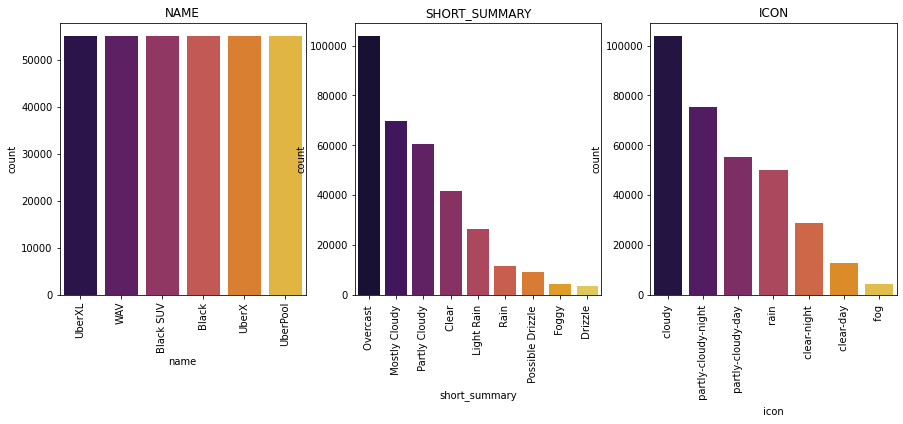

In [32]:
row,col,i = 1,3,1
plt.figure(figsize = (15,5))
for cat_col in cat_type_uber.columns:
    plt.subplot(row,col,i)
    plt.title(cat_col.upper(), fontsize = 12)
    sns.countplot(cat_type_uber[cat_col], palette = "inferno", order= cat_type_uber[cat_col].value_counts().index)
    plt.xticks(rotation = 90)
    i +=1
plt.show()

Melalui visualisasi 3 barplot diatas, dapat disimpulkan bahwa:
1. Tipe tranformasi Uber memiliki jumlah transaksi yang rata, yaitu berkisar diatas nilai 50000
2. Berdasarkan fitur short_summary, jumlah transaksi tertinggi terjadi ketika hari mendung (overcast) yaitu dengan nilai diatas 100.000, dan transaksi terendah terjadi ketika mengalami gerimis dengan nilai kurang dari (20.000)

**Visualisasi rata-rata harga jenis produk transportasi pada Uber**

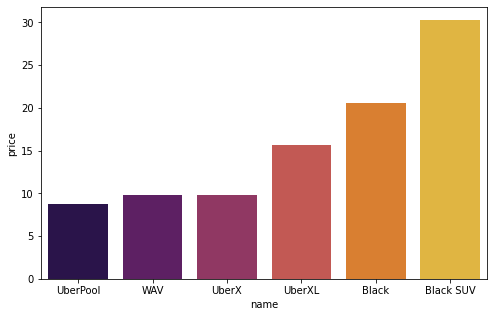

In [33]:
level_price = uber.groupby(["name"])[["price"]].mean()
plt.figure(figsize=(8, 5))
sns.barplot(level_price.index, level_price["price"], palette="inferno",
            order=level_price["price"].sort_values().index)
plt.show()

Tipe transportasi Uber dengan jenis kendaraan Black Suv memiliki rata-rataharga tertinggi, sedangkan yang terendah ada pada jenis UberPool

## Lyft Data Exploration

**Membuat dataframe untuk jenis transportasi Lyft**

In [34]:
lyft = df[df.cab_type == 'Lyft'].reset_index(drop=True)
lyft = lyft.drop(columns=['source','destination','cab_type'])
lyft.head()

,hour,day,month,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


**Membuat dataframe (Kategorik) untuk jenis transportasi Lyft**

In [35]:
cat_type_lyft = lyft.select_dtypes('object')
print(cat_type_lyft.shape)
cat_type_lyft.head()

(307408, 3)


,name,short_summary,icon
0,Shared,Mostly Cloudy,partly-cloudy-night
1,Lux,Rain,rain
2,Lyft,Clear,clear-night
3,Lux Black XL,Clear,clear-night
4,Lyft XL,Partly Cloudy,partly-cloudy-night


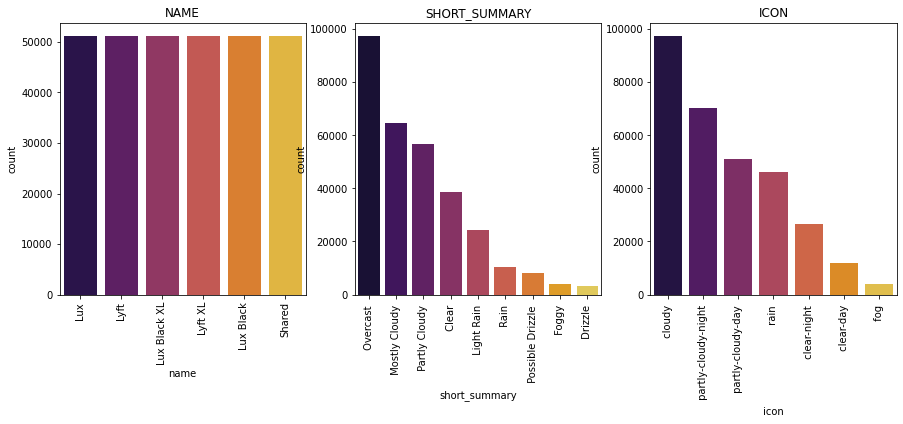

In [36]:
row,col,i = 1,3,1
plt.figure(figsize = (15,5))
for cat_col in cat_type_lyft.columns:
    plt.subplot(row,col,i)
    plt.title(cat_col.upper(), fontsize = 12)
    sns.countplot(cat_type_lyft[cat_col], palette = "inferno", order= cat_type_lyft[cat_col].value_counts().index)
    plt.xticks(rotation = 90)
    i +=1
plt.show()

Melalui visualisasi 3 barplot diatas, dapat disimpulkan bahwa:
1. Tipe tranformasi Lyft memiliki jumlah transaksi yang rata, yaitu berkisar diatas nilai 50000
2. Berdasarkan fitur short_summary, jumlah transaksi tertinggi terjadi ketika hari mendung (overcast) yaitu dengan nilai diatas 100.000, dan transaksi terendah terjadi ketika mengalami gerimis dengan nilai kurang dari (20.000)

Secara keseluruhan, hasil analisisnya hampir sama dengan tipe transportasi Uber

**Visualisasi rata-rata harga jenis produk transportasi pada Lyft**

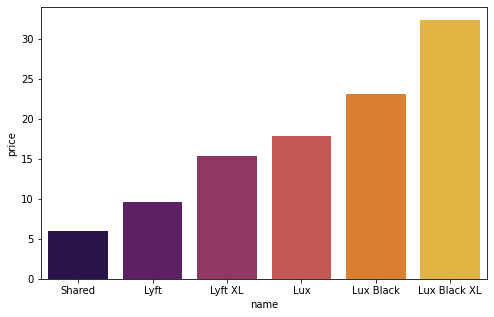

In [137]:
level_price = lyft.groupby(["name"])[["price"]].mean()
plt.figure(figsize = (8,5))
sns.barplot(level_price.index, level_price["price"],palette = "inferno",
            order = level_price["price"].sort_values().index)
plt.show()

Tipe transformasi Lyft dengan jenis kendaraan Lux Black XL memiliki rata-rata harga tertinggi, sedangkan yang terendah ada pada jenis Shared

# Data Preprocessing 2

## One-Hot Encoding

**Mengganti tipe data category pada tipe transportasi menjadi numerical (0 dan 1)**

In [37]:
df.cab_type = df.cab_type.replace({'Lyft': 0, 'Uber': 1})

In [139]:
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,0,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,0,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,0,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,0,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,0,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


**Menggunakan fitur One-Hot Encoding** untuk data category

In [38]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = df.select_dtypes(
    include=['object', 'category']).columns.tolist()
print(categorical_cols)

['source', 'destination', 'name', 'short_summary', 'icon']


- Inisiasi OneHotEncoder dan menggabungkan original dataframe dengan kolom yang telah di encode

In [39]:
for col in categorical_cols:
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
    encoder_df.columns = encoder.get_feature_names([col])
    df = df.drop(col, axis=1)
    df = pd.concat([df, encoder_df], axis=1)

- Melihat nama kolom setelah dilakukan One Hot Encoding

In [40]:
df.columns

Index(['hour', 'day', 'month', 'cab_type', 'price', 'distance',
       'surge_multiplier', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'name_Black', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name

## Drop Features (After One Hot Encoding)

**Mengecek korelasi pada fitur setelah dilakukan One Hot Encoding**

- **Fitur 'Source'**

In [143]:
source_cols = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University','source_Fenway',
               'source_Financial District', 'source_Haymarket Square','source_North End', 'source_North Station',
               'source_Northeastern University', 'source_South Station','source_Theatre District',
               'source_West End']
df_source = df[source_cols]
df_source.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


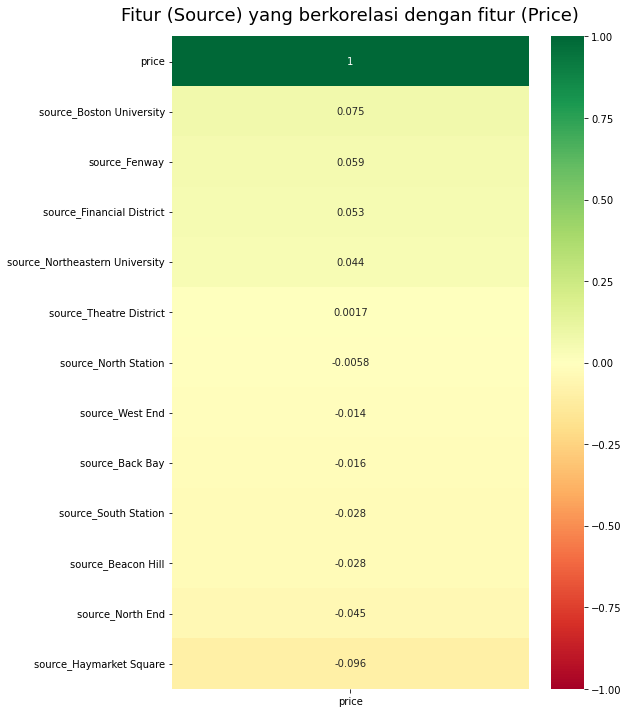

In [144]:
# Heatmap Korelasi (Source)
plt.figure(figsize=(8, 12))
heatmap3 =sns.heatmap(df_source.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap3.set_title('Fitur (Source) yang berkorelasi dengan fitur (Price)', fontdict={'fontsize':18}, pad=16);

- **Fitur 'Destination'**

In [145]:
destination_cols =['price','destination_Back Bay','destination_Beacon Hill', 'destination_Boston University',
                   'destination_Fenway', 'destination_Financial District','destination_Haymarket Square',
                   'destination_North End','destination_North Station', 'destination_Northeastern University',
                   'destination_South Station', 'destination_Theatre District','destination_West End']
df_destination = df[destination_cols]
df_destination.head()

,price,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


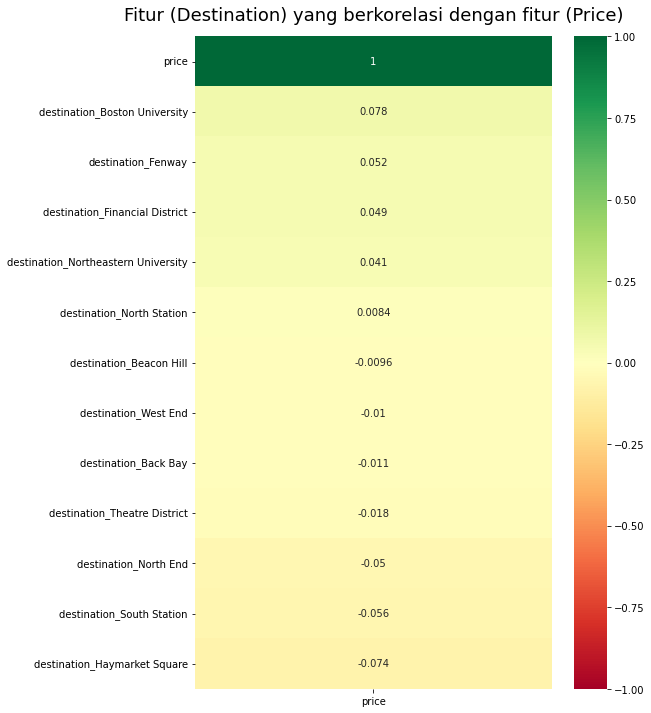

In [146]:
# Heatmap Korelasi (Destination)
plt.figure(figsize=(8, 12))
heatmap4 =sns.heatmap(df_destination.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap4.set_title('Fitur (Destination) yang berkorelasi dengan fitur (Price)', fontdict={'fontsize':18}, pad=16);

Karena data source dan data destination memiliki korelasi yang kecil dengan price, maka dilakukan drop terhadap kolom tersebut.

In [147]:
drop_cols = ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
df = df.drop(drop_cols, axis=1)
print(df.shape)
df.head()

(637976, 35)


,hour,day,month,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,0,5.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,0,11.0,0.44,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,0,7.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,0,26.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,0,9.0,0.44,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- **Fitur 'Short Summary'**

In [148]:
summary_cols = ['price','short_summary_ Clear ','short_summary_ Drizzle ', 'short_summary_ Foggy ',
                'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ','short_summary_ Overcast ',
                'short_summary_ Partly Cloudy ','short_summary_ Possible Drizzle ', 'short_summary_ Rain ']
df_summary = df[summary_cols]
df_summary.head()

,price,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


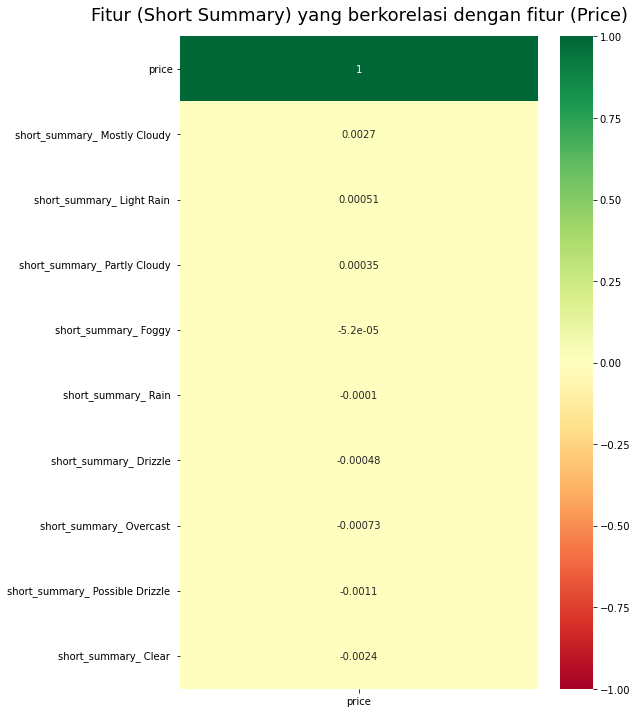

In [149]:
# Heatmap Korelasi (Short Summary)
plt.figure(figsize=(8, 12))
heatmap5 =sns.heatmap(df_summary.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap5.set_title('Fitur (Short Summary) yang berkorelasi dengan fitur (Price)', fontdict={'fontsize':18}, pad=16);

- **Fitur 'Icon'**

In [150]:
icon_cols = ['price', 'icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
             'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ', 'icon_ rain ']
df_icon = df[icon_cols]
df_icon.head()

,price,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


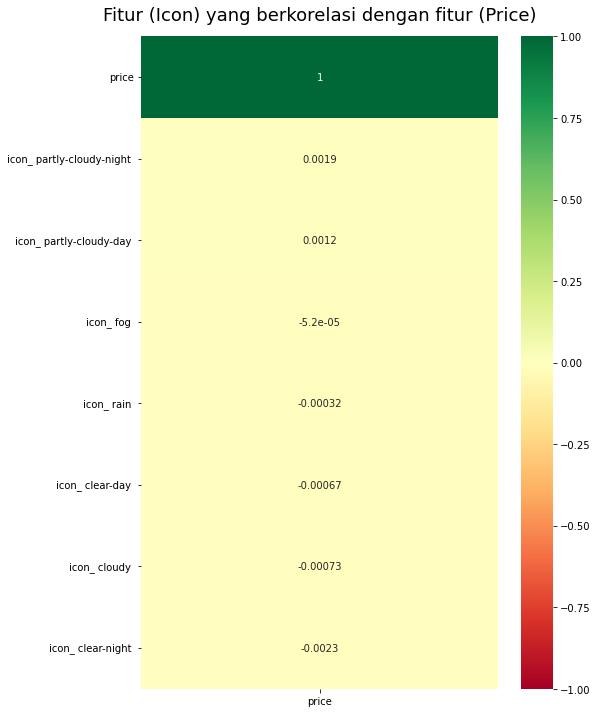

In [151]:
# Heatmap Korelasi (Icon)
plt.figure(figsize=(8, 12))
heatmap1 =sns.heatmap(df_icon.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap1.set_title('Fitur (Icon) yang berkorelasi dengan fitur (Price)', fontdict={'fontsize':18}, pad=16);

Karena data short_summary dan icon memiliki korelasi yang kecil dengan price, maka dilakukan drop kedua kolom tersebut.

In [152]:
drop_cols = ['short_summary_ Clear ','short_summary_ Drizzle ', 'short_summary_ Foggy ',
             'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ','short_summary_ Overcast ',
             'short_summary_ Partly Cloudy ','short_summary_ Possible Drizzle ', 'short_summary_ Rain ',
             'icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ','icon_ partly-cloudy-day ', 
             'icon_ partly-cloudy-night ','icon_ rain ']
df = df.drop(drop_cols,axis=1)
print(df.shape)
df.head()

(637976, 19)


,hour,day,month,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,16,12,0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,27,11,0,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,28,11,0,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,0,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,0,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


- **Fitur 'Name'**

In [153]:
name_cols = ['price', 'name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
             'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV']
df_name = df[name_cols]
df_name.head()

,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


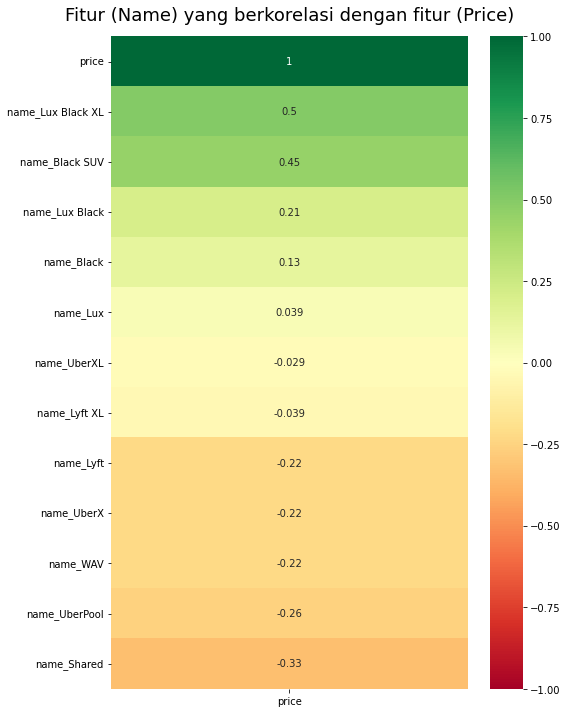

In [154]:
# Heatmap Korelasi (Name)
plt.figure(figsize=(8, 12))
heatmap1 =sns.heatmap(df_name.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap1.set_title('Fitur (Name) yang berkorelasi dengan fitur (Price)', fontdict={'fontsize':18}, pad=16);

Karena kolom 'Name' memiliki korelasi yang cukup kuat terhadap Price, maka kolom tersebut akan dipertahankan dan tidak dilakukan drop.

- **Fitur 'Hour', 'Day', 'Month', 'Distance', 'Surge Multiplier', 'Cab Type**

In [155]:
other_cols = ['price','hour', 'day', 'month', 'distance', 'surge_multiplier','cab_type']
df_other = df[other_cols]
df_other.head()

,price,hour,day,month,distance,surge_multiplier,cab_type
0,5.0,9,16,12,0.44,1.0,0
1,11.0,2,27,11,0.44,1.0,0
2,7.0,1,28,11,0.44,1.0,0
3,26.0,4,30,11,0.44,1.0,0
4,9.0,3,29,11,0.44,1.0,0


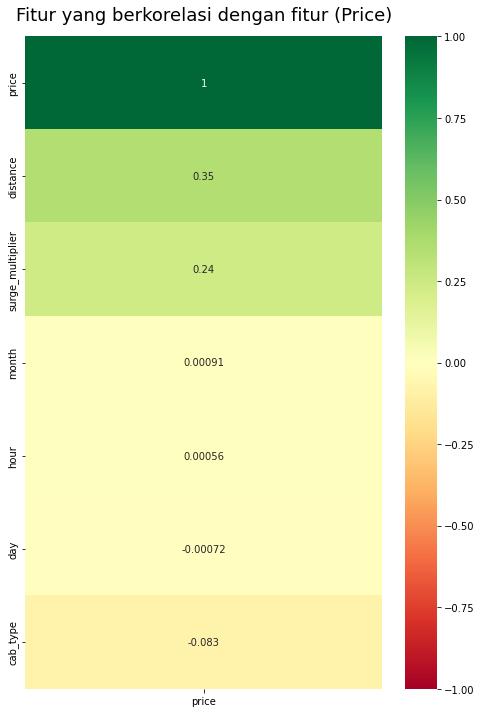

In [156]:
# Heatmap korelasi
plt.figure(figsize=(8, 12))
heatmap1 =sns.heatmap(df_other.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap1.set_title('Fitur yang berkorelasi dengan fitur (Price)', fontdict={'fontsize':18}, pad=16);

Dikarenakan nilai korelasi yang rendah pada beberapa fitur, maka dilakukan drop untuk fitur hour, day, dan month.

In [157]:
df = df.drop(['hour', 'day', 'month'], axis=1)
print(df.shape)
df.head()

(637976, 16)


,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Mengecek missing values pada kolom yang tersisa**

In [41]:
df.isnull().sum()

hour                                   0
day                                    0
month                                  0
cab_type                               0
price                                  0
distance                               0
surge_multiplier                       0
source_Back Bay                        0
source_Beacon Hill                     0
source_Boston University               0
source_Fenway                          0
source_Financial District              0
source_Haymarket Square                0
source_North End                       0
source_North Station                   0
source_Northeastern University         0
source_South Station                   0
source_Theatre District                0
source_West End                        0
destination_Back Bay                   0
destination_Beacon Hill                0
destination_Boston University          0
destination_Fenway                     0
destination_Financial District         0
destination_Haym

## Filtering Dataframe (Handling Outlier)

In [42]:
# Nilai derajat tertinggi
max_threshold = df.price.quantile(0.99)
max_threshold

42.5

In [160]:
df[df.price>max_threshold]

,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
645,0,52.5,3.25,2.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,0,67.5,3.25,2.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,0,45.5,4.76,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0,45.5,4.31,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,0,45.5,5.33,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637394,1,47.0,5.56,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637637,0,52.5,4.58,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637813,0,47.5,5.42,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637878,1,51.0,7.36,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Nilai derajat terendah
min_threshold = df.price.quantile(0.01)
min_threshold

3.5

In [162]:
df[df.price<min_threshold]

,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
8,0,3.0,1.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50,0,3.0,0.71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
159,0,3.0,1.40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
312,0,3.0,1.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
361,0,3.0,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637611,0,3.0,1.69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
637660,0,3.0,3.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
637705,0,3.0,0.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
637779,0,3.0,3.13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Melihat outlier dengan menggunakan Boxplot**

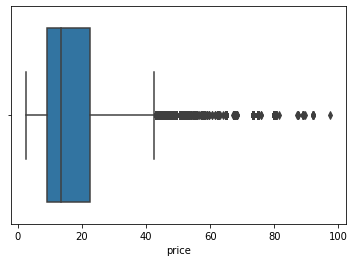

In [163]:
sns.boxplot(df.price)

**Melihat nilai outlier pada data diatas nilai max_threshold**

In [44]:
outliers = np.where(df.price > 42.5)
print(outliers[0])
print(np.count_nonzero(np.where(df.price > 42.5)))

[   645    646    706 ... 637813 637878 637917]
5589


- Hapus semua 5589 baris pada array tersebut, karena jika masih terdapat outliers pada data maka nilai error akan bertambah.

In [45]:
df.drop(outliers[0], inplace=True)
df.shape

(632387, 59)

## Tahap Akhir

**Mengecek skewness pada semua fitur**

distance
0.7767567965635372


<Figure size 432x288 with 0 Axes>

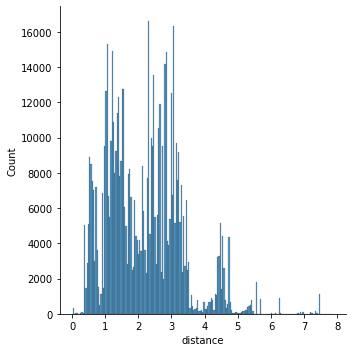

surge_multiplier
8.847590589161022


<Figure size 432x288 with 0 Axes>

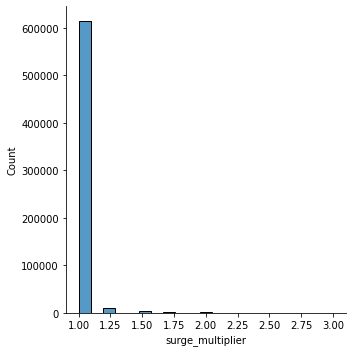

In [46]:
from scipy.stats import skew
columns = ['distance', 'surge_multiplier']
for col in columns:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.displot(df[col])
    plt.show()

Kolom distance dan surge multiplier memiliki skew yang sangat tinggi dengan nilai 0.77 dan 8.84. Selanjutnya lakukan pengecekan nilai korelasinya dengan fitur price (data target)

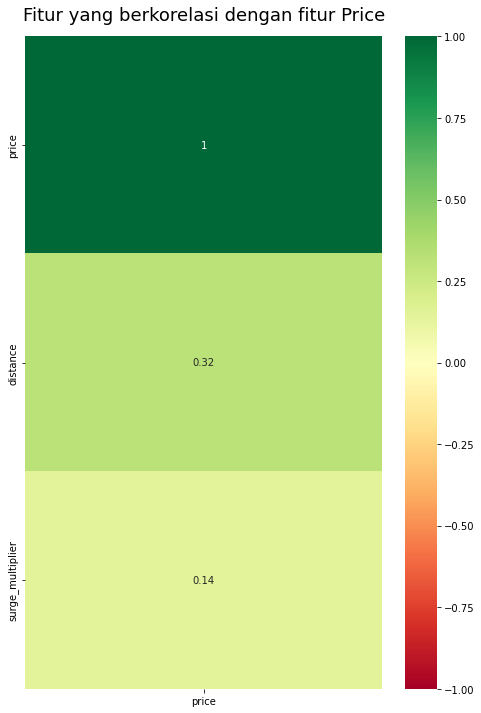

In [47]:
columns = ['price','distance','surge_multiplier']
df_cek = df[columns]
plt.figure(figsize=(8, 12))
heatmap7 =sns.heatmap(df_cek.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap7.set_title('Fitur yang berkorelasi dengan fitur Price', fontdict={'fontsize':18}, pad=16);

Surge multiplier memiliki nilai skew yang tinggi dan korelasi yang kurang dengan predictand (price), dimana kolom distance memiliki korelasi yang sangat baik. 

Selanjutnya akan dilakukan penurunan nilai skewness dari surge multiplier menggunakan transformasi BoxCox. **Transformasi Box-Cox** merupakan transformasi pangkat pada variabel respons yang dikembangkan oleh Box dan Cox, yang bertujuan untuk menormalkan data, melinearkan model regresi dan menghomogenkan varians. 

**Transformasi Box-Cox pada surge_multiplier**

In [48]:
from scipy import stats

df.surge_multiplier = stats.boxcox(df.surge_multiplier)[0]
pd.Series(df.surge_multiplier).skew()

5.64331840785854

**Melihat deskripsi statistik data target (Price)**

In [49]:
df.price.describe()

count    632387.000000
mean         16.245314
std           8.769536
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          42.500000
Name: price, dtype: float64

**Melakukan perubahan nama kolom pada fitur 'Name' hasil One-Hot Encoding**

In [50]:
df.rename(columns={'name_Black':'Uber Black','name_Black SUV':'Uber Black SUV', 'name_Lux':'Lyft Lux',
                   'name_Lux Black':'Lyft Lux Black','name_Lux Black XL':'Lyft Lux Black XL','name_Lyft':'Lyft',
                   'name_Lyft XL':'Lyft XL', 'name_Shared':'Lyft Shared', 'name_UberPool':'Uber Pool',
                   'name_UberX':'Uber X', 'name_UberXL':'Uber XL', 'name_WAV':'Uber WAV'}, inplace=True)

**Drop kolom 'cab_type' karena sudah diwakili pada setiap fitur 'Name' hasil One Hot Encoding**

In [51]:
df.drop(columns=['cab_type'], inplace=True)
df.head()

,hour,day,month,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Mendefinisikan X dan y**

In [52]:
# Data Target
y = df['price']
y.head(3)

0     5.0
1    11.0
2     7.0
Name: price, dtype: float64

In [53]:
# Data Fitur
X = df.drop(columns=['price'], axis=1)
X.head()

,hour,day,month,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,0.44,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,0.44,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,0.44,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,0.44,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,0.44,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Modeling


Splitting data dilakukan dengan komposisi (Training 80: Test 20)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model_LR = LinearRegression()
model = model_LR.fit(x_train, y_train)
ypred = model.predict(x_test)

**Melihat dimensi data X dan y test**

In [55]:
X.shape

(632387, 57)

In [56]:
print(x_test.shape)
print(y_test.shape)
print(ypred.shape)

(126478, 57)
(126478,)
(126478,)


**Koefisien model dan intercept**

In [57]:
model.coef_

array([ 5.92194719e-04, -5.82311493e-05,  8.63538487e-03,  2.76296327e+00,
        6.47161039e+02,  7.78853115e+08,  7.78853115e+08,  5.75263393e+08,
        5.75263394e+08,  7.78853115e+08,  5.75263394e+08,  5.75263394e+08,
        7.78853115e+08,  5.75263393e+08,  5.75263394e+08,  7.78853116e+08,
        7.78853115e+08,  2.44750375e+08,  2.44750375e+08,  4.11606533e+07,
        4.11606531e+07,  2.44750375e+08,  4.11606536e+07,  4.11606535e+07,
        2.44750375e+08,  4.11606535e+07,  4.11606534e+07,  2.44750375e+08,
        2.44750375e+08, -8.62715963e+07, -8.62715867e+07, -8.62715996e+07,
       -8.62715945e+07, -8.62715858e+07, -8.62716077e+07, -8.62716020e+07,
       -8.62716108e+07, -8.62716081e+07, -8.62716070e+07, -8.62716012e+07,
       -8.62716070e+07, -2.26985964e+09, -1.90198553e+09, -1.08165768e+09,
       -1.90198553e+09,  2.24912302e+09, -6.76786310e+08,  2.24912302e+09,
       -1.90198553e+09, -1.90198553e+09,  2.23562709e+08,  2.23562709e+08,
       -1.36951062e+09, -

In [58]:
model.intercept_

1312554775.152875

# Model Evaluation

R squared atau R2 merupakan angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen. Semakin mendekati angka satu, model yang dikeluarkan oleh regresi tersebut akan semakin baik. 

**Mengecek nilai R2 untuk Linear Regression**

In [59]:
from sklearn import metrics
metrics.r2_score(y_test, ypred)

0.9322476209581622

Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from numpy import mean

cross_val = ShuffleSplit(n_splits=10, test_size=0.2, random_state=5)

mean(cross_val_score(LinearRegression(), X, y, cv=cross_val))

0.9318139869688563

**Melihat scatter plot hasil regresi**

Text(0, 0.5, 'Predicted Y')

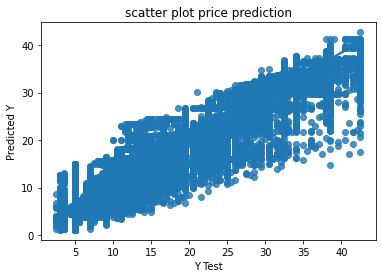

In [61]:
sns.regplot(y_test, ypred)
plt.title("scatter plot price prediction")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**Parameter Linear Regression**

Root Mean Square Error (RMSE), adalah jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan. RMSE biasanya digunakan untuk model Linear Regression.

Untuk menghitung nilai MSE sama halnya dengan RMSE. Hanya saja tidak menggunakan proses akar. Pada tahap ini, jika nilai error nya semakin besar maka semakin besar nilai MSE yang dihasilkan.

MAE atau Mean Absolute Error menunjukkan nilai kesalahan rata-rata yang error dari nilai sebenarnya dengan nilai prediksi. MAE sendiri secara umum digunakan untuk pengukuran prediksi error pada analisis time series

In [62]:
mse = metrics.mean_squared_error(y_test, ypred)
rootmse = np.sqrt(mse)
print(mse)
print(rootmse)

5.210217873554754
2.2825901676724083


In [63]:
mae = metrics.mean_absolute_error(y_test, ypred)
rootmae = np.sqrt(mae)
print(mae)
print(rootmae)

1.66520002840645
1.2904262971616978


**Mendefinisikan program predict_price**

In [64]:
def predict_price(name_cab,distance,surge_multiplier):    
    loc_index = np.where(X.columns==name_cab)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = distance
    x[1] = surge_multiplier
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [65]:
predict_price('Lyft Lux',0.44,0.0)

1226283175.5628777

In [66]:
predict_price('Uber Pool',1.0, 0.0)

1226283167.1006372

# Save model in pickle file

In [67]:
# simpan model kedalam file dengan pickle
import pickle
pickle.dump(model, open('./predict_price_model.pkl','wb'))

In [68]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

# Kesimpulan

Dari pengolahan dan analisis yang dilakukan, didapatkan kesimpulan bahwa dengan menerapkan komposisi training-test split 80:20 pada dataset ini, diperolah nilai R2 model sebesar 0.93 (semakin mendekati 1) dan nilai RMSE sebesar 2.3 (semakin kecil mendekati 0), dimana dapat dikatakan bahwa kinerja model regresi linier dalam memprediksi harga Price untuk moda transportasi Uber dan Lyft sudah baik.